# Librays

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt


from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras import backend as K

# Loading the data

In [39]:
data = pd.read_csv('processed_data_Encoding.csv')

X = data.drop('y', axis=1)
y = data['y']

In [40]:
# Apply SMOTE to the training data (this only applies to the training set)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [41]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'balance', 'campaign', 'previous','balance_no_previous']

# scaling only to the specified numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(X[numerical_cols])

# Create a DataFrame with the principal components
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

X = pd.concat([X, pca_df], axis=1)

In [43]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Trainning

c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.7346 - loss: 0.5101 - val_accuracy: 0.9055 - val_loss: 0.2391
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9053 - loss: 0.2610 - val_accuracy: 0.9014 - val_loss: 0.2455
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.9123 - loss: 0.2423 - val_accuracy: 0.9120 - val_loss: 0.2254
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9123 - loss: 0.2363 - val_accuracy: 0.9131 - val_loss: 0.2188
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.9128 - loss: 0.2344 - val_accuracy: 0.9133 - val_loss: 0.2203
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.9121 - loss: 0.2301 - val_accuracy: 0.9159 - val_loss: 0.2187
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.9165 - loss: 0.2247 - val_accuracy: 0.9169 - val_loss: 0.2167
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9142 -

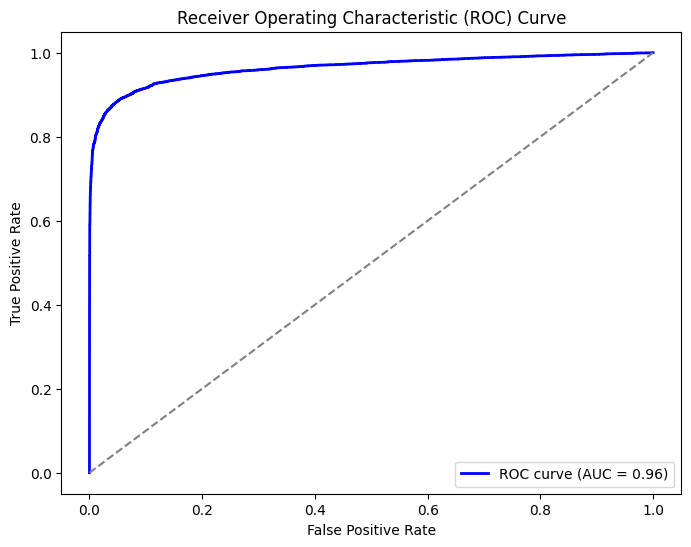

AUC: 0.96


In [44]:
# Build the model
model = Sequential()

# Input layer: Define the number of input features (adjust based on your dataset)
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # X_train should be your feature matrix
model.add(Dropout(0.3))  # Regularization using dropout

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Training the model (adjust the epochs and batch size based on your dataset)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

# Evaluate the model on test data (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# Tunning 

In [45]:
# Clear any previous TensorFlow session
K.clear_session()

# Define the HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), 
                        activation='relu', input_dim=X_train.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        # Second hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Hyperparameter for learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,             # Number of different models to try
    executions_per_trial=3,    # Number of times to train each model
    directory='smote_tuner_results', # Directory to store the results
    project_name='banking_model_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32,
             validation_split=0.2)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Manually rebuild the best model
best_model = Sequential()
best_model.add(Dense(units=best_hyperparameters.get('units_1'), 
                     activation='relu', 
                     input_dim=X_train.shape[1]))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_1')))
best_model.add(Dense(units=best_hyperparameters.get('units_2'), 
                     activation='relu'))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_2')))
best_model.add(Dense(1, activation='sigmoid'))

best_model.compile(optimizer=Adam(learning_rate=best_hyperparameters.get('learning_rate')),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the manually rebuilt best model
history = best_model.fit(X_train, y_train, 
                         epochs=50, 
                         batch_size=32, 
                        validation_split=0.2)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy}")


Reloading Tuner from smote_tuner_results\banking_model_tuning\tuner0.json
Best hyperparameters: {'units_1': 256, 'dropout_1': 0.4, 'units_2': 96, 'dropout_2': 0.4, 'learning_rate': 0.0003222050995679572}
Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.7233 - loss: 0.5656 - val_accuracy: 0.9033 - val_loss: 0.2548
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.8956 - loss: 0.2777 - val_accuracy: 0.9105 - val_loss: 0.2336
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9058 - loss: 0.2535 - val_accuracy: 0.9126 - val_loss: 0.2301
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.9102 - loss: 0.2409 - val_accuracy: 0.9121 - val_loss: 0.2250
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9103 - loss: 0.2342 - val_accuracy: 0.9148 - val_loss: 0.2221
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9115 - loss: 0.2344 - val_accuracy: 0.9150 - val_loss: 0.2217
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.9154 - loss: 0.2265 - val_accuracy: 0.9146 - val_loss: 0.2177
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9148 - loss: 0.22

# Tunning evaluation

Epoch 1/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.9269 - loss: 0.1902 - val_accuracy: 0.9198 - val_loss: 0.2124
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.9287 - loss: 0.1879 - val_accuracy: 0.9186 - val_loss: 0.2126
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9269 - loss: 0.1895 - val_accuracy: 0.9187 - val_loss: 0.2131
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.9295 - loss: 0.1860 - val_accuracy: 0.9192 - val_loss: 0.2130
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9284 - loss: 0.1881 - val_accuracy: 0.9188 - val_loss: 0.2131
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9282 - loss: 0.1898 - val_accuracy: 0.9177 - val_loss: 0.2125
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.9264 - loss: 0.1933 - val_accuracy: 0.9188 - val_loss: 0.2137
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.9276 -

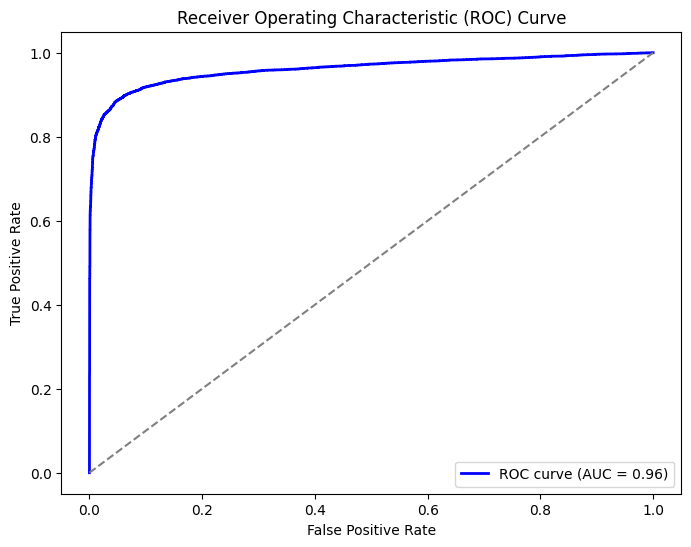

AUC: 0.96
Best hyperparameters: {'units_1': 256, 'dropout_1': 0.4, 'units_2': 96, 'dropout_2': 0.4, 'learning_rate': 0.0003222050995679572}


In [46]:
# Get the history of the best model's training
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on the test data (X_test and y_test)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set (for ROC curve)
y_prob = best_model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")